In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

df = pd.concat([fake, real])

In [3]:
print(fake.shape)
print(real.shape)
print(df.shape)

(23481, 4)
(21417, 4)
(44898, 4)


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df.describe()

,title,text,subject,date
count,44898,44898,44898,44898
unique,38729,38646,8,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,14,627,11272,182


En faisant une analyse exploratoire de notre jeu de donnée, nous pouvons observer que le domaine le plus traité est celui de la politique. C'est notamment dans celui-ci que les Fake News sont importantes.

In [8]:
def displaySubjectPlot(df, title):
    subjects = df['subject'].unique()
    cmap = plt.colormaps["tab10"]
    plt.figure(figsize=(10, 6))
    for i, subject in enumerate(subjects):
        plt.hist(df[df['subject'] == subject]['subject'], color=cmap(i), alpha=0.5, label=subject)
    plt.legend()
    plt.xticks(range(len(subjects)), subjects, rotation=45, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()

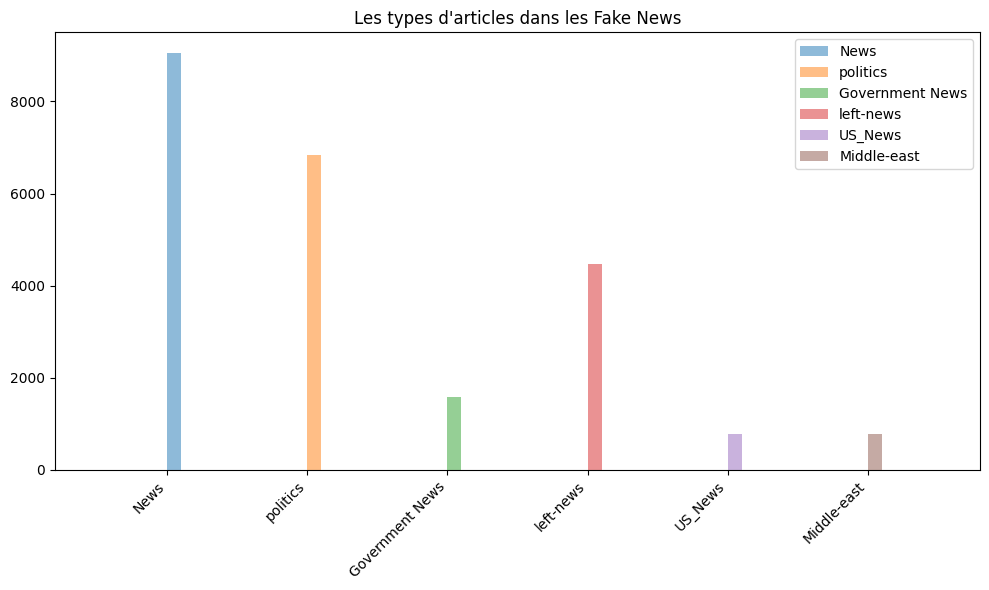

In [9]:
displaySubjectPlot(fake, "Les types d'articles dans les Fake News")

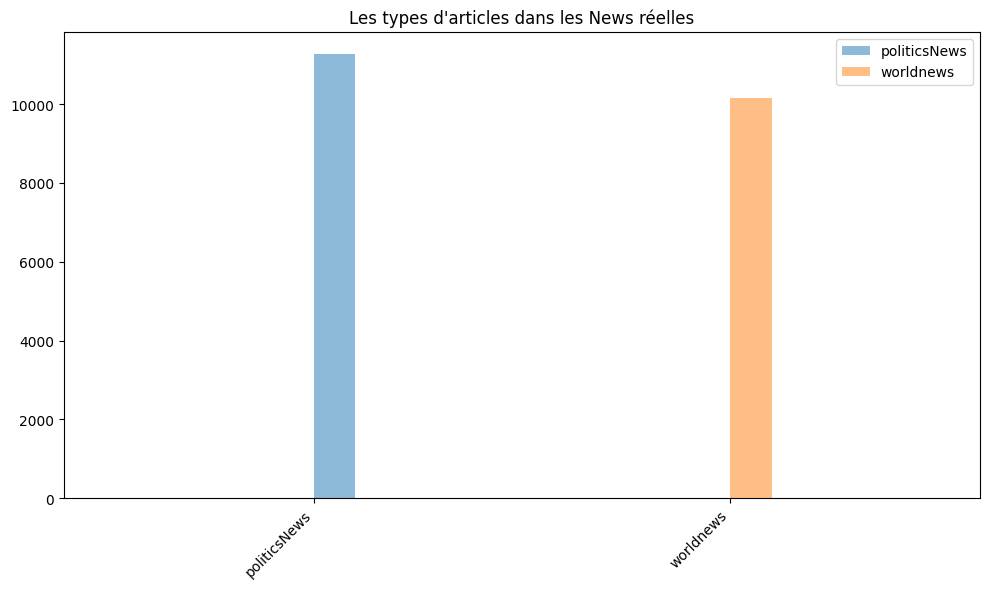

In [10]:
displaySubjectPlot(real, "Les types d'articles dans les News réelles")

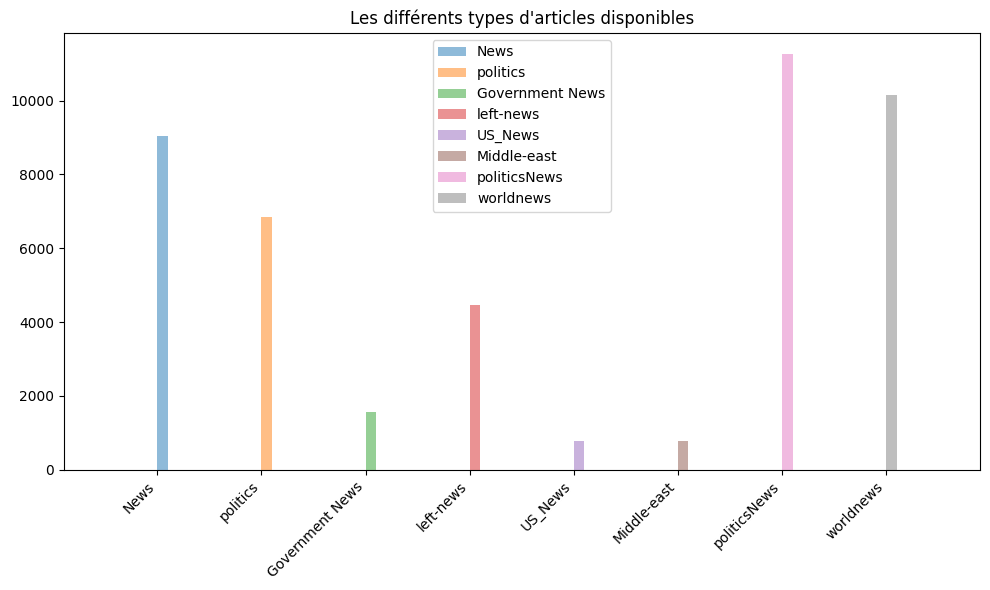

In [11]:
displaySubjectPlot(df, "Les différents types d'articles disponibles")

In [12]:
df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
df["text"] = df[["title","text"]].agg(" ".join, axis=1)

In [14]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017"


In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [17]:
df['cluster_label'] = kmeans.labels_

In [18]:
df

,title,text,subject,date,cluster_label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,'Fully committed' NATO backs new U.S. approach...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,LexisNexis withdrew two products from Chinese ...,worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,Minsk cultural hub becomes haven from authorit...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican upbeat on possibility of Pope Francis ...,worldnews,"August 22, 2017",1


In [19]:
cluster_sizes = df.groupby('cluster_label').size()
fake_sizes = (fake.shape[0], real.shape[0])
fake_proportions = (cluster_sizes[0] / sum(fake_sizes), cluster_sizes[1] / sum(fake_sizes))

In [20]:
print("Proportion de fake news dans cluster 0:", fake_proportions[0])
print("Proportion de fake news dans cluster 1:", fake_proportions[1])

Proportion de fake news dans cluster 0: 0.6224776159294401
Proportion de fake news dans cluster 1: 0.37752238407055994


D'après l'analyse, le cluster 0 représente à 62% tous les articles étant des Fake news, tandis que le cluster 1 contient toutes les vraies News avec 37.7% d'erreur.

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

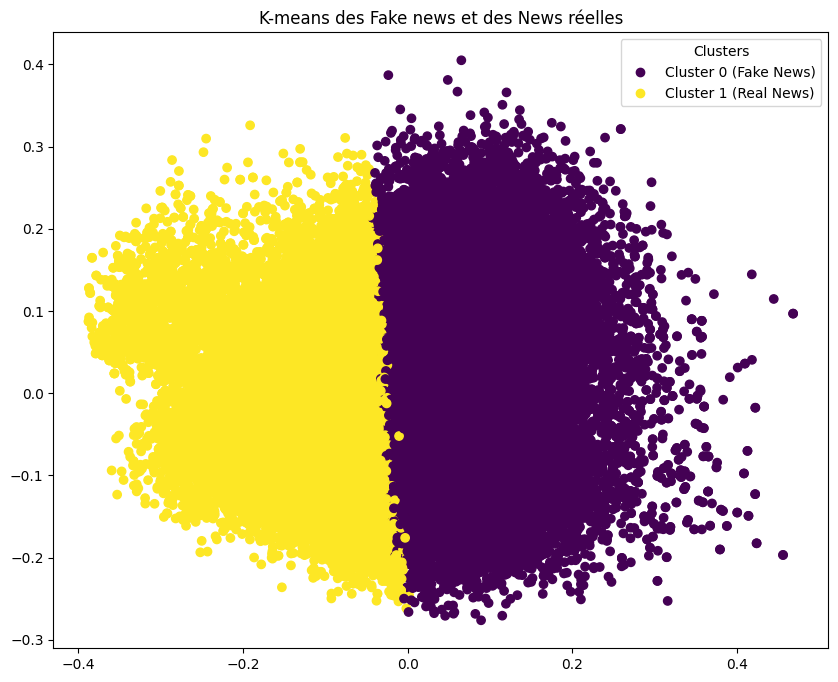

In [22]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('K-means des Fake news et des News réelles')
legend_labels = ['Cluster 0 (Fake News)', 'Cluster 1 (Real News)']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')
plt.show()

Si on se réfère aux datasets d'origine, on a à peu près 50% fake et 50% vrai (avec un peu plus de fake que de vrai). On peut donc conclure que notre analyse n'est pas entièrement érronée mais elle n'est pas assez précise pour autant.

On peut d'ailleurs voir où sont les erreurs : si on regarde à la coupure entre cluster 0 et cluster 1, il y a quelques points du cluster 1 qui vont dans le cluster 0.

Nous pouvons probablement déduire que certains articles sont difficiles à différiencer du vrai au faux.

In [43]:
df.loc[:, 'source'] = df['text'].str.extract(r' via (.+)', expand=False)
df.loc[:, 'source'] = df['source'].fillna('Unknown')
df_sources = df[df['source'] != 'Unknown'][['source', 'cluster_label']]

In [24]:
def comp_news_Fake_Real(df, label):
    cluster_counts = df['cluster_label'].value_counts()
    print("Sources " + label + " :")
    print(df['source'])
    print("\nCluster 0 (Fake):", cluster_counts.get(0, 0))
    print("Cluster 1 (Réel):", cluster_counts.get(1, 0))

In [25]:
df_twitter = df[df['source'] == "Twitter"]
comp_news_Fake_Real(df_twitter, "Twitter")

Sources Twitter :
213     Twitter
629     Twitter
911     Twitter
913     Twitter
954     Twitter
         ...   
8874    Twitter
8895    Twitter
8935    Twitter
8989    Twitter
8995    Twitter
Name: source, Length: 156, dtype: object

Cluster 0 (Fake): 133
Cluster 1 (Réel): 23


In [26]:
df_getty = df[df['source'].str.contains(r'\bGetty\b', case=False)]
comp_news_Fake_Real(df_getty, "Getty")

Sources Getty :
5         David McNew/Stringer/Getty Images
7          Chris Kleponis/Pool/Getty Images
8       BRENDAN SMIALOWSKI/AFP/Getty Images
9                Al Drago-Pool/Getty Images
10                     Rob Kim/Getty Images
                       ...                 
7314                           Getty Images
7318                           Getty Images
7326           Justin Sullivan/Getty Images
7328                           Getty Images
7334              Steve Marcus/Getty Images
Name: source, Length: 3158, dtype: object

Cluster 0 (Fake): 2878
Cluster 1 (Réel): 280


In [27]:
df_other = df[df['source'] == "Unknown"]
comp_news_Fake_Real(df_other, "Autre")

Sources Autre :
0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
21412    Unknown
21413    Unknown
21414    Unknown
21415    Unknown
21416    Unknown
Name: source, Length: 36634, dtype: object

Cluster 0 (Fake): 20627
Cluster 1 (Réel): 16007
